# **Project Name**    - Integrating MLOps for Predictive and Recommender Systems in Travel/ gender_classification_model

##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Problem Statement**


Gender Classification Model:

Deploy a classification model to categorize a user's gender

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import random
from google.colab import drive
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Dataset Loading

In [ ]:
# Load Dataset
url1 = 'https://raw.githubusercontent.com/satyamkulkarni122/Integrating-MLOps-for-Predictive-and-Recommender-Systems-in-Travel/main/flights.csv'
url2 = 'https://raw.githubusercontent.com/satyamkulkarni122/Integrating-MLOps-for-Predictive-and-Recommender-Systems-in-Travel/main/hotels.csv'
url3 = 'https://raw.githubusercontent.com/satyamkulkarni122/Integrating-MLOps-for-Predictive-and-Recommender-Systems-in-Travel/main/users.csv'
flight_df = pd.read_csv(url1)
hotel_df = pd.read_csv(url2)
user_df = pd.read_csv(url3)


In [ ]:
flight_df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [ ]:
hotel_df.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [ ]:
user_df.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


# **Data Preprocessing**

In [ ]:
user_df.isnull().sum()

code       0
company    0
name       0
gender     0
age        0
dtype: int64

In [ ]:
user_df.duplicated().sum()

0

In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


1. gender feature is our dependent feature,we will encode the categorical values in this feature i.e male and female using label encoder,to fetch it into our classification model for training.1 denotes male and 0 denotes female.

2. Similarly we will encode values in company features using label encoder.

3. On name feature we will use NLP model such as sentence transformer and use pca technique,before fetching it for buliding the classification model.

In [ ]:
# Summary of categorical features
user_df.describe(include=object)

,company,name,gender
count,1340,1340,1340
unique,5,1338,3
top,4You,Charlotte Johnson,male
freq,453,2,452


As we see ,we have 3 categories in our target variable ,let's deep dive into the target variable.

In [ ]:
user_df['gender'].value_counts()

gender
male      452
female    448
none      440
Name: count, dtype: int64

In [ ]:
#filtering records based on relavent categories in the target variable
user_df1=user_df[(user_df['gender']=='male') | (user_df['gender']=='female') ]

In [ ]:
# Encode userCode and company to numeric values
label_encoder = LabelEncoder()

user_df1['company_encoded'] = label_encoder.fit_transform(user_df1['company'])
user_df1['gender_encoded'] = label_encoder.fit_transform(user_df1['gender'])

user_df1.head()

,code,company,name,gender,age,company_encoded,gender_encoded
0,0,4You,Roy Braun,male,21,0,1
1,1,4You,Joseph Holsten,male,37,0,1
2,2,4You,Wilma Mcinnis,female,48,0,0
3,3,4You,Paula Daniel,female,23,0,0
4,4,4You,Patricia Carson,female,44,0,0


In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Initialize the SentenceTransformer model
model = SentenceTransformer('flax-sentence-embeddings/all_datasets_v4_MiniLM-L6')

# Encode text-based columns and create embeddings
text_columns = ['name']

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
for column in text_columns:
    user_df1[column + '_embedding'] = user_df1[column].apply(lambda text: model.encode(text))

In [ ]:
# Concatenate the embeddings into a single feature vector
text_embeddings = user_df1[text_columns].values.tolist()

In [ ]:
#  Apply PCA separately to each text embedding column
n_components = 23  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
text_columns = ['name']
# Create an empty array to store the PCA-transformed embeddings
text_embeddings_pca = np.empty((len(user_df1), n_components * len(text_columns)))

In [ ]:
for i, column in enumerate(text_columns):
    embeddings = user_df1[column + '_embedding'].values.tolist()
    embeddings_pca = pca.fit_transform(embeddings)
    text_embeddings_pca[:, i * n_components:(i + 1) * n_components] = embeddings_pca

numerical_features=['code','company_encoded','age']

X_numerical = user_df1[numerical_features].values

In [ ]:
# Combine PCA-transformed text embeddings and numerical features
X = np.hstack((text_embeddings_pca, X_numerical))
# Target variable
y = user_df1['gender_encoded']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Logistic Regression**

In [ ]:
# Initialize a Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42)

# Fit the model to the training data
lr_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_classifier.predict(X_test)

In [ ]:
# Calculate and print accuracy
accuracy = lr_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_lr)
print("\nClassification Report:\n", report)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

Accuracy: 0.9555555555555556

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95        77
           1       0.94      0.98      0.96       103

    accuracy                           0.96       180
   macro avg       0.96      0.95      0.95       180
weighted avg       0.96      0.96      0.96       180



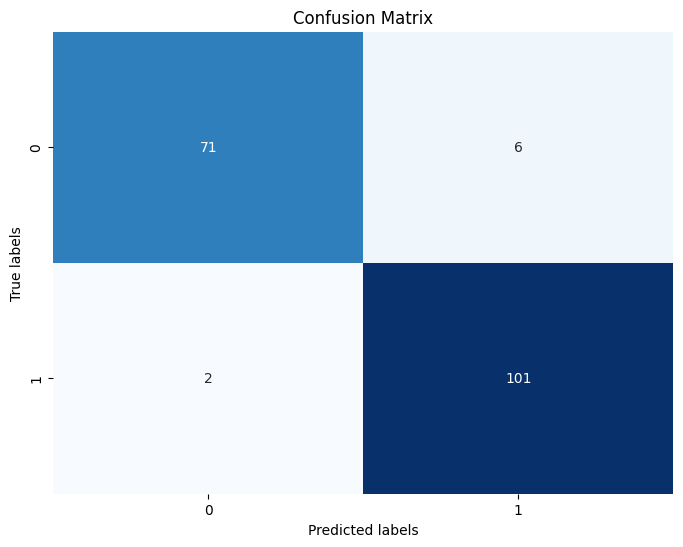

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
lr_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = lr_classifier.predict(X_train)
y_val_pred = lr_classifier.predict(X_val)

In [ ]:
# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.9722222222222222
Validation Accuracy: 0.9666666666666667


In [ ]:
# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")


The model is overfitting.


# **Decision Tree Classifier**

In [ ]:
# Initialize a decision tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [ ]:
# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = dt_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_dt)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred_dt)

Accuracy: 0.5666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.36      0.42        77
           1       0.60      0.72      0.65       103

    accuracy                           0.57       180
   macro avg       0.55      0.54      0.54       180
weighted avg       0.55      0.57      0.55       180



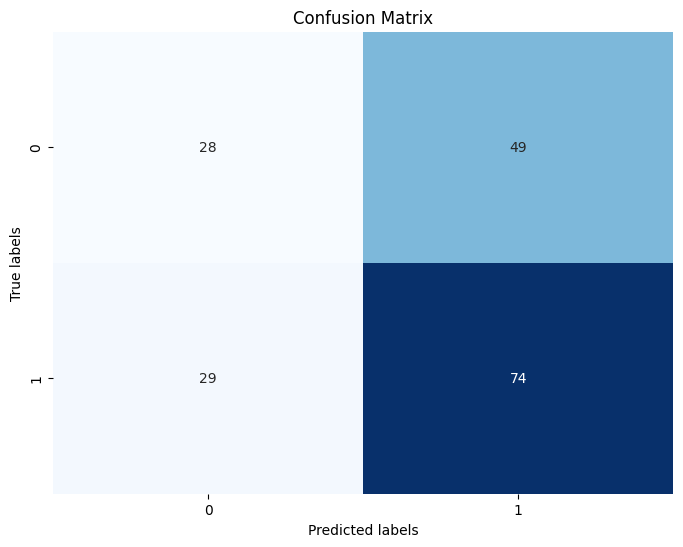

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = dt_classifier.predict(X_train)
y_val_pred = dt_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 1.0
Validation Accuracy: 0.9666666666666667


In [ ]:
# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

The model is overfitting.


# **Random Forest Classifier**

In [ ]:
# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

**Evaluation**

In [ ]:
# Calculate and print accuracy
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred_rf)

Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        77
           1       0.93      0.97      0.95       103

    accuracy                           0.94       180
   macro avg       0.95      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180



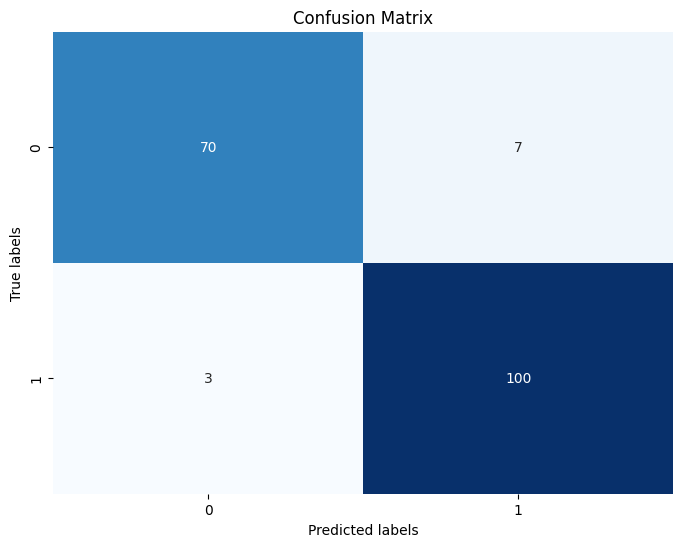

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = rf_classifier.predict(X_train)
y_val_pred = rf_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 1.0
Validation Accuracy: 0.9777777777777777


In [ ]:
# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")


The model is overfitting.


# **Gradient Boosting Classifier**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = gb_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_gb)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, y_pred_gb)

Accuracy: 0.9722222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97        77
           1       0.97      0.98      0.98       103

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



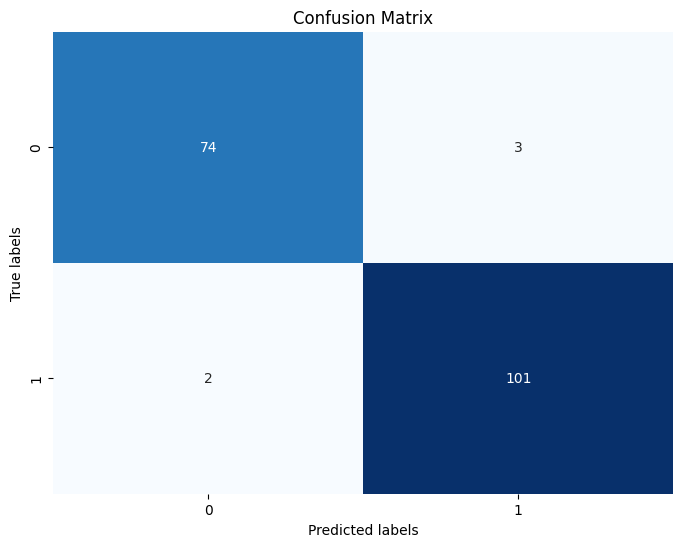

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
gb_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = gb_classifier.predict(X_train)
y_val_pred = gb_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 1.0
Validation Accuracy: 0.9722222222222222


In [ ]:
# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

The model is overfitting.


#**ROC-AUC Curve**

In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Evaluate the model
    report = classification_report(y_test, y_pred)

     # Print accuracy and classification report
    #print(f"\nAccuracy for {model_name}: {accuracy:.2f}")
    #print(f"Classification Report for {model_name}:\n{report}")

    # Return accuracy and classification report
    return report

In [ ]:
# Initialize models
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
logistic_regression = LogisticRegression(random_state=42)

In [ ]:
# Create a dictionary to store the classification reports
model_reports = {}

# Train and evaluate each model
print("Now.... RF")
model_reports['Random Forest'] = train_and_evaluate_model(random_forest, X_train, y_train, X_test, y_test, 'Random Forest')
print("Now.... GB")
model_reports['Gradient Boosting'] = train_and_evaluate_model(gradient_boosting, X_train, y_train, X_test, y_test, 'Gradient Boosting')
print("Now.... DT")
model_reports['Decision Tree'] = train_and_evaluate_model(decision_tree, X_train, y_train, X_test, y_test, 'Decision Tree')
print("Now.... Logistic Regression")
model_reports['Logistic Regression'] = train_and_evaluate_model(logistic_regression, X_train, y_train, X_test, y_test, 'Logistic Regression')


# Save the classification reports to a CSV file
reports_df = pd.DataFrame.from_dict(model_reports, orient='index', columns=['Classification Report'])
reports_df.to_csv('classification_reports.csv')

Now.... RF
Now.... GB
Now.... DT
Now.... Logistic Regression


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Assuming y_test and y_pred are lists or arrays containing true labels and predicted probabilities for each model

# Initialize lists to store fpr, tpr, and roc_auc for each model
fpr_list = []
tpr_list = []
roc_auc_list = []

# Compute ROC curve and ROC AUC for each model
for y_pred in [y_pred_lr,y_pred_dt,y_pred_rf,y_pred_gb]:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)


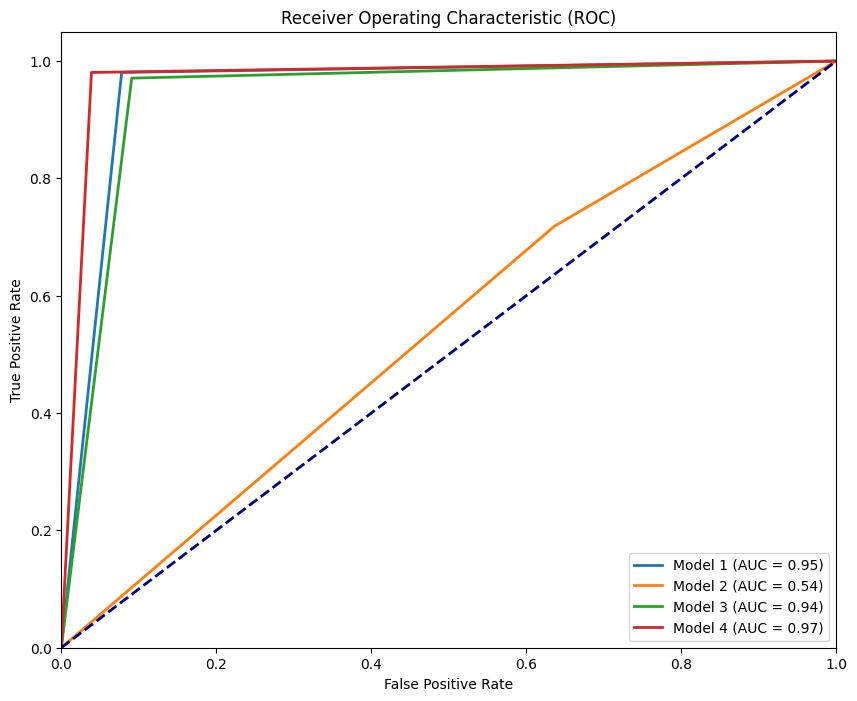

In [ ]:
# Plot ROC curves for each model
plt.figure(figsize=(10, 8))
for i, roc_auc in enumerate(roc_auc_list):
    plt.plot(fpr_list[i], tpr_list[i], lw=2, label=f'Model {i+1} (AUC = {roc_auc:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#**Benchmark Model Selection and Hyperparameter Tuning**

**Logistic Regression is our Benchmark model**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.01, 0.1, 1, 4, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

# Initialize a Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(lr_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model found by GridSearchCV
best_lr_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_lr_tuned = best_lr_classifier.predict(X_test)

# Calculate and print accuracy using the best model
accuracy_tuned = best_lr_classifier.score(X_test, y_test)
print("Tuned Model Accuracy:", accuracy_tuned)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Model Accuracy: 0.9611111111111111



Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95        77
           1       0.94      0.99      0.97       103

    accuracy                           0.96       180
   macro avg       0.97      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



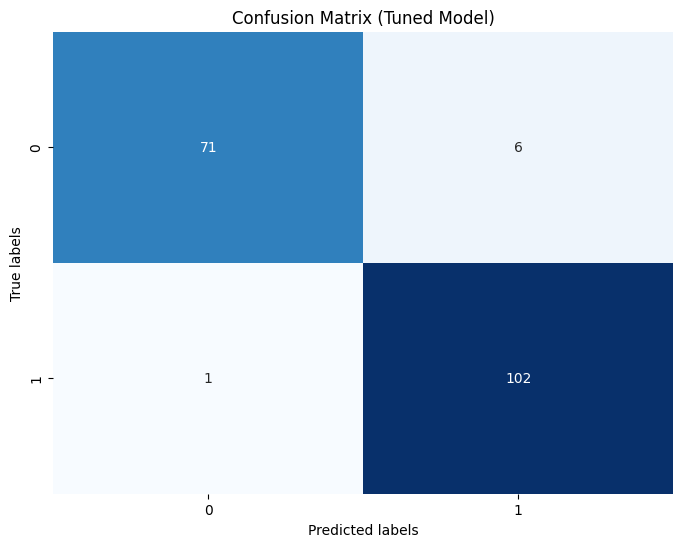

In [ ]:
# Generate a classification report using the tuned model
report_tuned = classification_report(y_test, y_pred_lr_tuned)
print("\nTuned Model Classification Report:\n", report_tuned)

# Calculate confusion matrix using the tuned model
cm_tuned = confusion_matrix(y_test, y_pred_lr_tuned)

# Plot confusion matrix using the tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
best_lr_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = best_lr_classifier.predict(X_train)
y_val_pred = best_lr_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)


Training Accuracy: 0.9666666666666667
Validation Accuracy: 0.9611111111111111


In [ ]:
# Check if overfitting
if (train_accuracy - val_accuracy) > 0.01:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

The model is not overfitting.


#**Pickle the Benchmark model**

In [ ]:
import pickle

# Pickle the tuned logistic regression model
with open('tuned_logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(best_lr_classifier, file)

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***